<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/socio-economic/EconomicDataExporation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "/content/drive/My Drive/Colab Notebooks/Final-Project-for-CS109a/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_excel(data_path + 'boston_neighborhood_demographics_2013-2017.xlsx', sheet_name="HH Income", skiprows=[0,1], header=0, skipfooter=3)

In [8]:
data.head()

,Unnamed: 0,Median Income,Total Households,"$14,999 and under",%,"$15,000 to $24,999",%.1,"$25,000 to $34,999",%.2,"$35,000 to $49,999",%.3,"$50,000 to $74,999",%.4,"$75,000 to $99,999",%.5,"$100,000 to $149,999",%.6,"$150,000 +",%.7
0,United States,57652.00,118825921,13710365,0.115382,11637905,0.097941,11330288,0.095352,15412493,0.129706,21000314,0.176732,14636046,0.123172,16701857,0.140557,14396653,0.121158
1,Massachusetts,74167.00,2585715,269677,0.104295,203309,0.078628,186707,0.072207,255677,0.098881,390219,0.150913,317494,0.122788,451683,0.174684,510949,0.197605
2,Boston,62021.00,263229,47236,0.179448,22654,0.086062,18413,0.069950,24161,0.091787,37621,0.142921,26157,0.099370,39811,0.151241,47176,0.179220
3,Allston,46982.76,6457,1453,0.225027,584,0.090444,603,0.093387,781,0.120954,1042,0.161375,544,0.084250,912,0.141242,538,0.083320
4,Back Bay,102070.55,9824,1402,0.142712,381,0.038783,350,0.035627,582,0.059243,1237,0.125916,879,0.089475,1586,0.161441,3407,0.346804


In [16]:
data.tail()

,Unnamed: 0,Median Income,Total Households,"$14,999 and under",%,"$15,000 to $24,999",%.1,"$25,000 to $34,999",%.2,"$35,000 to $49,999",%.3,"$50,000 to $74,999",%.4,"$75,000 to $99,999",%.5,"$100,000 to $149,999",%.6,"$150,000 +",%.7
21,South Boston,93077.60,16628,2288,0.137599,1174,0.070604,857,0.051540,1020,0.061342,1745,0.104943,1701,0.102297,3249,0.195393,4594,0.276281
22,South Boston Waterfront,150677.51,1830,110,0.060109,60,0.032787,58,0.031694,66,0.036066,153,0.083607,192,0.104918,271,0.148087,920,0.502732
23,South End,86994.80,16193,2809,0.173470,1183,0.073056,887,0.054777,887,0.054777,1915,0.118261,866,0.053480,2115,0.130612,5531,0.341567
24,West End,96787.15,3134,489,0.156031,220,0.070198,191,0.060944,163,0.052010,287,0.091576,249,0.079451,500,0.159541,1035,0.330249
25,West Roxbury,80804.46,13757,1187,0.086283,1288,0.093625,788,0.057280,1202,0.087374,2065,0.150105,1501,0.109108,2452,0.178237,3274,0.237988


In [17]:
data.iloc[3:, 0]

3                     Allston
4                    Back Bay
5                 Beacon Hill
6                    Brighton
7                 Charlestown
8                  Dorchester
9                    Downtown
10                East Boston
11                     Fenway
12             Harbor Islands
13                  Hyde Park
14              Jamaica Plain
15                   Longwood
16                   Mattapan
17               Mission Hill
18                  North End
19                 Roslindale
20                    Roxbury
21               South Boston
22    South Boston Waterfront
23                  South End
24                   West End
25               West Roxbury
Name: Unnamed: 0, dtype: object

In [18]:
boston_areas = data.iloc[3:, 0]

In [19]:
boston_areas = boston_areas.reset_index(drop=True)

In [20]:
boston_areas

0                     Allston
1                    Back Bay
2                 Beacon Hill
3                    Brighton
4                 Charlestown
5                  Dorchester
6                    Downtown
7                 East Boston
8                      Fenway
9              Harbor Islands
10                  Hyde Park
11              Jamaica Plain
12                   Longwood
13                   Mattapan
14               Mission Hill
15                  North End
16                 Roslindale
17                    Roxbury
18               South Boston
19    South Boston Waterfront
20                  South End
21                   West End
22               West Roxbury
Name: Unnamed: 0, dtype: object

In [13]:
crime = pd.read_csv(data_path + 'tmpawx7s6l7.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
districts = crime.DISTRICT.unique()

In [21]:
districts

array(['External', 'C6', 'E18', 'E13', 'C11', 'D14', 'B2', 'A15', 'E5',
       'A1', 'B3', 'A7', 'D4', nan], dtype=object)

In [22]:
districts = ['D14', 'D4', 'A1', 'D14', 'A15', 'C11', 'A1', 'A7', 'D4', 'NaN', 'E18', 'E13', 'D4', 'B3', 'B2', 'A1', 'E5', 'B2', 'C6', 'C6', 'D4', 'A1', 'E5']

In [23]:
d = {'neighborhood': boston_areas, 'district': districts}

In [24]:
boston_locs = pd.DataFrame(data=d)

In [25]:
boston_locs

,neighborhood,district
0,Allston,D14
1,Back Bay,D4
2,Beacon Hill,A1
3,Brighton,D14
4,Charlestown,A15
5,Dorchester,C11
6,Downtown,A1
7,East Boston,A7
8,Fenway,D4
9,Harbor Islands,NaN


In [ ]:
boston_locs.to_csv('Boston-Neighborhoods-to-Districts.csv')

In [26]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [27]:
crime[['DISTRICT']].value_counts()

DISTRICT
B2          82674
C11         70098
D4          66182
B3          60058
A1          56461
C6          37251
D14         32980
E18         29120
E13         28695
E5          22280
A7          21292
A15         10573
External      107
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


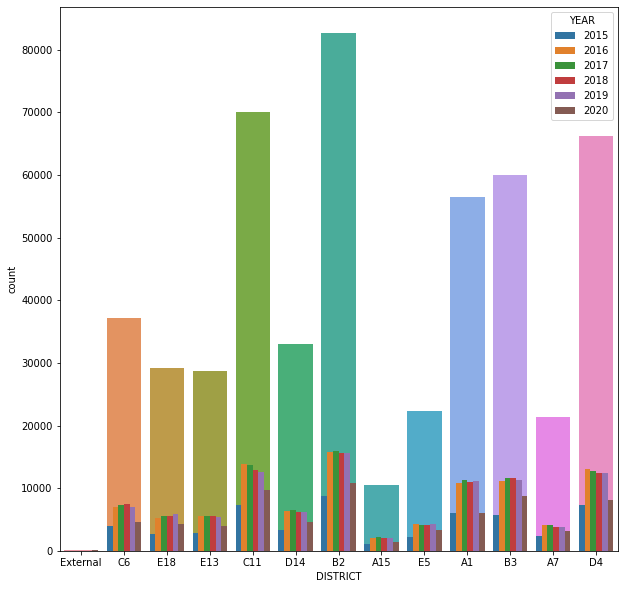

In [29]:
plt.figure(figsize=(10,10))
sns.countplot('DISTRICT', data=crime)
sns.countplot(x='DISTRICT', hue="YEAR", data=crime)

In [30]:
august = crime.loc[crime['MONTH']==8]

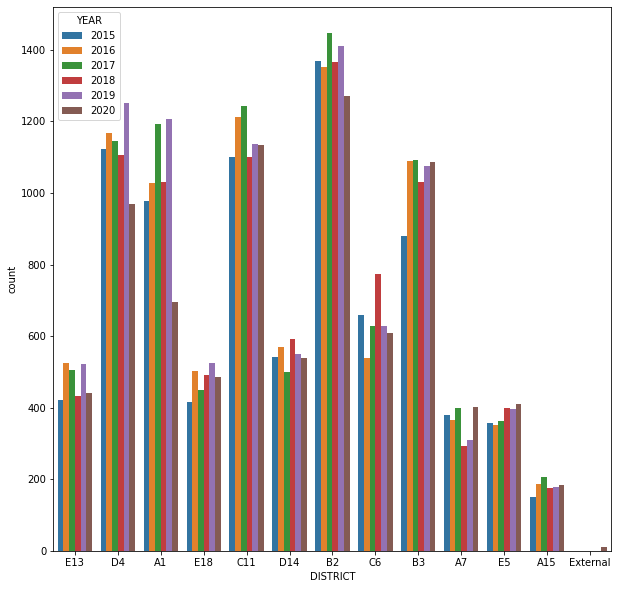

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='DISTRICT', hue='YEAR', data=august)